# $$\text{Análisis exploratorio}$$

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv('dolarblue.csv')
df_ex = df.drop(['event'], axis =1)
df_ex.head()

,date,usd_blue,usd_official,international_reserves,event_type,inflation
0,2002-03-04,2.12,2.01,13732.0,ninguno,7.9
1,2002-03-05,2.12,1.99,13794.0,ninguno,7.9
2,2002-03-06,2.14,2.05,13798.0,ninguno,7.9
3,2002-03-07,2.22,2.14,13809.0,ninguno,7.9
4,2002-03-08,2.27,2.20,13774.0,ninguno,7.9


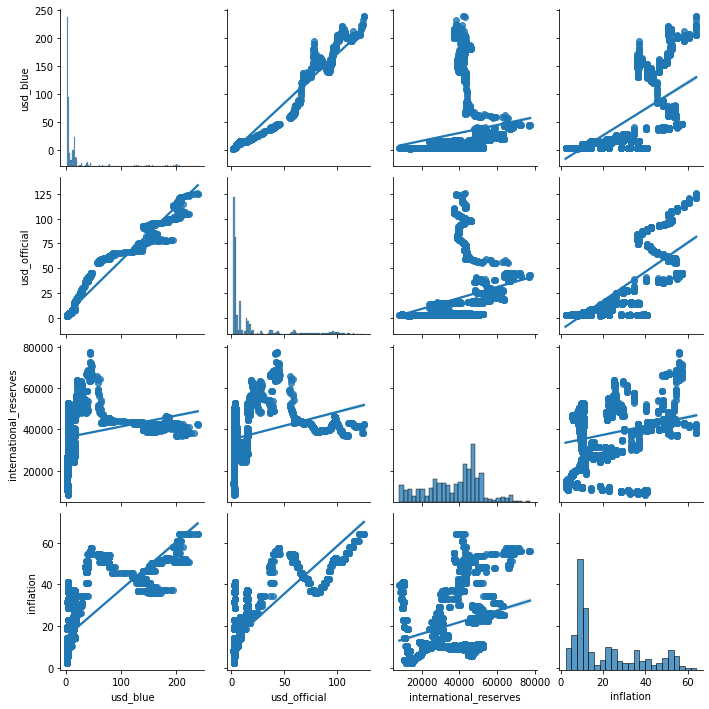

In [15]:
import seaborn as sns
sns.pairplot(df_ex, kind='reg')
plt.show()

Podemos observar que existe una relación fuerte entre el dólar blue y la inflación, de la misma manera existe una relación poco fuerte con las reservas internacionales del país, y una relación extremadamente fuerte con el dólar oficial.

In [23]:
df = df[-1460:]
df = df.reset_index(drop=True)

In [ ]:
df['moment'] = df['usd_blue'] - df['usd_official']
mx = df['moment'].max()
dft = df[df['moment'] == mx]
dft['date']

In [38]:
import plotly.graph_objects as go

fig= go.Figure()
fig.add_trace(go.Scatter(x=df['date'],
                            y=df['usd_blue'],
                            mode='lines',
                            name='dolar blue'))
fig.add_trace(go.Scatter(x=df['date'],
                            y=df['usd_official'],
                            mode='lines',
                            name='dolar official'))
fig.add_trace(go.Scatter(x=dft['date'],
                            y=dft['usd_official'],
                            mode='markers + text',
                            name='Mejor momento de compra',
                            marker=dict(color='red',size=12),
                            text = '2022-01-27',
                            textposition="top center"))
fig.update_xaxes(
        rangeselector=dict(
                buttons=list([
                        dict(count=1, label='Ultimo Mes', step='month', stepmode='backward'),
                        dict(count=6, label='Ultimos 6 Meses', step='month', stepmode='backward'),
                        dict(label='Ultimos 12 Meses' , step='all')
                ])
        ))
fig.show()

# $$\text{Regresión Lineal}$$

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(df_ex['inflation']).reshape(-1,1)
y = np.array(df_ex['usd_blue']).reshape(-1,1)

#datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25)

#regresión
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.5639548810199146

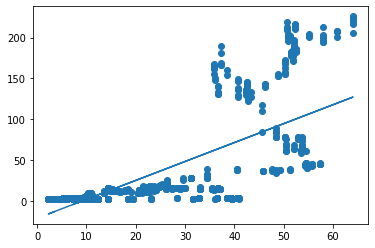

In [17]:
# ploteo
y_pred = reg.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

In [ ]:
# transformación de datos categoricos one hot encoder
df_ex['event_type'] = df_ex['event_type'].astype('category')
# codificación one hot encoder
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder()
codificación = codificador.fit_transform(df_ex[['event_type']])
new_column = pd.DataFrame(codificación.toarray(), columns=codificador.categories_)

#uniendo...
df_ex.drop(['event_type'], axis=1, inplace=True)
df_ex = pd.concat([df_ex, new_column], axis=1)